In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/TensorQuest')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [14]:
df = pd.read_csv('Spam_SMS.csv')
df.head(5)

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit_transform(df['Class'])

## Ham is 0
## Spam is 1

array([0, 0, 1, ..., 0, 0, 0])

In [16]:
df['Class'] = encoder.fit_transform(df['Class'])

In [17]:
df.head(3)

,Class,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [18]:
df.isnull().sum()

,0
Class,0
Message,0


In [19]:
df.duplicated().sum()

415

In [20]:
df = df.drop_duplicates(keep='first')

df.duplicated().sum()

0

In [21]:
df.shape

(5159, 2)

In [22]:
df['Class'].value_counts()

,count
Class,
0,4518
1,641


In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
df['No_of_char'] = df['Message'].apply(len)

df.head(3)

,Class,Message,No_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [25]:
nltk.download('punkt_tab')
df['No_of_Word'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

df.head(3)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Class,Message,No_of_char,No_of_Word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [26]:
df['No_of_Sent'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

df.sample(10)

,Class,Message,No_of_char,No_of_Word,No_of_Sent
3975,0,Roger that. We‘re probably going to rem in abo...,51,13,2
1600,0,"Yeah probably, I still gotta check out with leo",47,11,1
5280,1,URGENT! Your Mobile number has been awarded wi...,143,27,5
4865,0,Sorry da..today i wont come to play..i have dr...,58,15,1
1230,0,Jus ans me lar. U'll noe later.,31,10,2
2608,0,:-) yeah! Lol. Luckily i didn't have a starrin...,62,18,3
1374,1,"Bears Pic Nick, and Tom, Pete and ... Dick. In...",151,34,3
5294,1,Urgent! Please call 09061213237 from landline....,154,34,7
995,0,"I can't, I don't have her number!",33,11,1
3249,0,Also track down any lighters you can find,41,8,1


In [28]:
df[df['Class'] == 0][['No_of_char','No_of_Word','No_of_Sent']].describe() ## Statistical analysis of Ham

,No_of_char,No_of_Word,No_of_Sent
count,4518.000000,4518.000000,4518.000000
mean,70.861000,17.302125,1.827579
std,56.584513,13.592056,1.394245
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
df[df['Class'] == 1][['No_of_char','No_of_Word','No_of_Sent']].describe() ## Statistical analysis of Spam

,No_of_char,No_of_Word,No_of_Sent
count,641.000000,641.000000,641.000000
mean,137.413417,27.722309,2.979719
std,29.998996,7.032577,1.483627
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='No_of_char', ylabel='Count'>

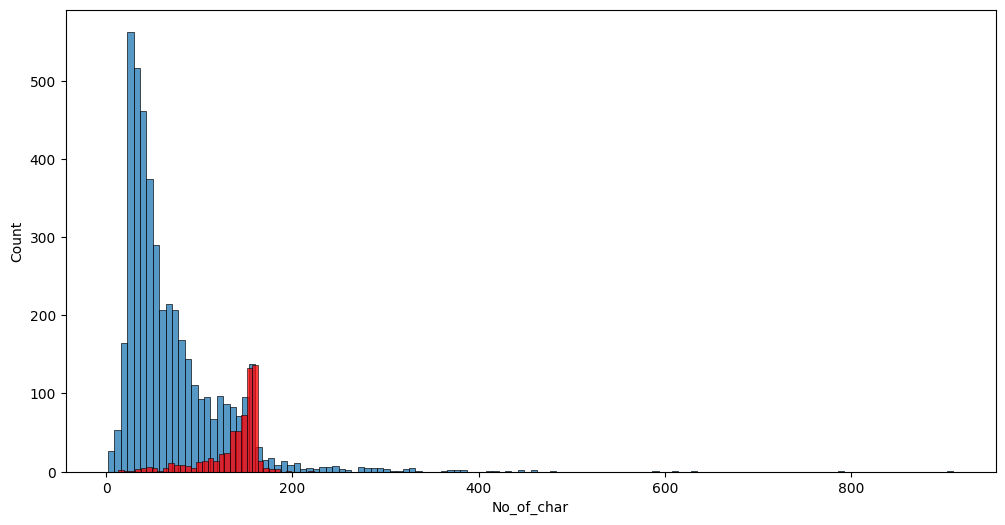

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class'] == 0]['No_of_char'])
sns.histplot(df[df['Class'] == 1]['No_of_char'] ,color='red')

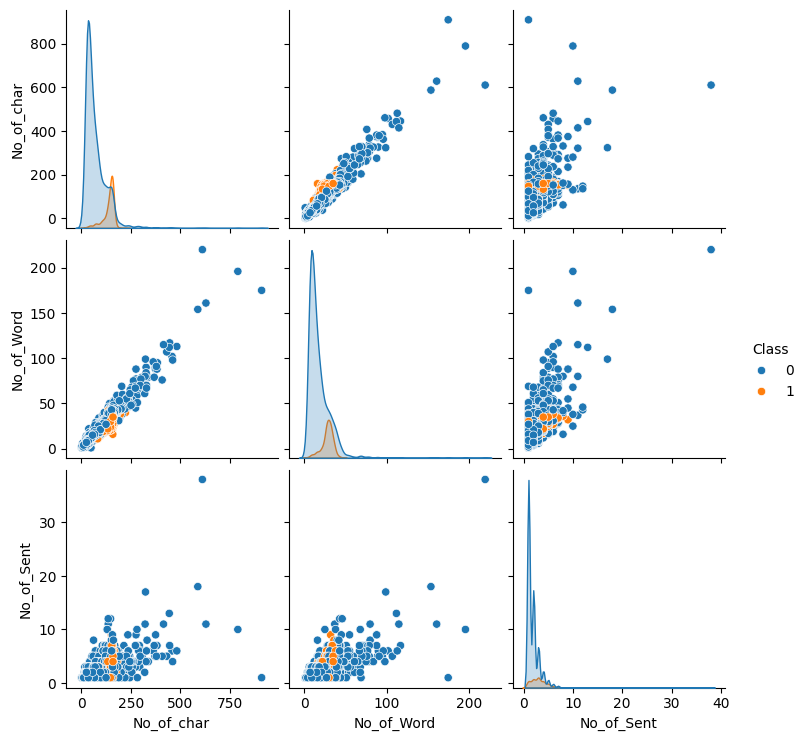

In [32]:
sns.pairplot(df, hue = 'Class')

In [33]:
import re

def extract_currency_amounts(text):
    """
    Detects currency symbols and their associated amounts in a text.

    Args:
        text (str): The input text to analyze.

    Returns:
        List[Tuple[str, float]]: A list of tuples containing detected currency symbols and amounts.
    """

    pattern = r'([₹$€£¥])\s?([\d,]+(?:\.\d{1,2})?)'  ## Regular expression to match currency symbols and amounts

    matches = re.findall(pattern, text)  ## Find all matches in the text

    results = [(symbol, float(amount.replace(',', ''))) for symbol, amount in matches] ## Process matches to remove commas from numbers and convert to float

    if not results:
        return 0 ## Returns 0 if no money amount is there
    else:
        return 1 ## Return 1 otherwise

In [37]:
df['isCurrrencyPresent'] = df['Message'].apply(extract_currency_amounts)

df.head(10)

,Class,Message,No_of_char,No_of_Word,No_of_Sent,isCurrrencyPresent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,0
1,0,Ok lar... Joking wif u oni...,29,8,2,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,0
3,0,U dun say so early hor... U c already then say...,49,13,1,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,1
6,0,Even my brother is not like to speak with me. ...,77,18,2,0
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,0
8,1,WINNER!! As a valued network customer you have...,157,32,5,1
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,0


In [41]:
print(df[df['Class'] == 1]['isCurrrencyPresent'].sum()) ## Number of SPAM messages which contains money amount

212


In [42]:
print(df[df['Class'] == 0]['isCurrrencyPresent'].sum()) ## Number of HAM messages which contains money amount

12


In [43]:
import re

def contains_url(text):
    """
    Checks if a string contains any kind of URL.

    Args:
        text (str): The input string to check.

    Returns:
        int: 1 if the string contains a URL, 0 otherwise.
    """
    url_pattern = re.compile(
        r'(https?://|www\.)'                 # Matches http://, https://, or www.
        r'[\w\-]+(\.[\w\-]+)+'              # Matches domain and subdomains
        r'(:\d+)?'                          # Optional port
        r'(/[^\s]*)?'                       # Optional path
    )
    return 1 if url_pattern.search(text) else 0

In [44]:
df['isURLPresent'] = df['Message'].apply(extract_currency_amounts)

df.head(10)

,Class,Message,No_of_char,No_of_Word,No_of_Sent,isCurrrencyPresent,isURLPresent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,0,0
1,0,Ok lar... Joking wif u oni...,29,8,2,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,0,0
3,0,U dun say so early hor... U c already then say...,49,13,1,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,0
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,1,1
6,0,Even my brother is not like to speak with me. ...,77,18,2,0,0
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,0,0
8,1,WINNER!! As a valued network customer you have...,157,32,5,1,1
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,0,0


In [48]:
from nltk.corpus import stopwords
nltk.download('stopwords')

import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [49]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [50]:
transform_text("I love you darling.")

'love darl'

In [51]:
df['Transformed_Message'] = df['Message'].apply(transform_text)

In [53]:
df.head(10)

,Class,Message,No_of_char,No_of_Word,No_of_Sent,isCurrrencyPresent,isURLPresent,Transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,0,0,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,0,0,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,0,0,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,0,0,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,0,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,1,1,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,0,0,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,0,0,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,157,32,5,1,1,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,0,0,mobil 11 month u r entitl updat latest colour ...


In [58]:
spam_words = []

for msg in df[df['Class'] == 1]['Transformed_Message'].tolist():
  for words in msg.split():
      spam_words.append(words)  ## Collecting spam words

len(spam_words)

9792

In [60]:
from collections import Counter
pd.DataFrame(Counter(spam_words).most_common(30)) ## Making dictionary of top 30 spam words

,0,1
0,call,313
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,118
7,mobil,110
8,stop,108
9,repli,102


from matplotlib import pyplot as plt
_df_0[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

In [61]:
ham_words = []

for msg in df[df['Class'] == 0]['Transformed_Message'].tolist():
  for words in msg.split():
      ham_words.append(words)  ## Collecting spam words

len(ham_words)

35953

In [62]:
from collections import Counter
pd.DataFrame(Counter(spam_words).most_common(30)) ## Making dictionary of top 30 ham words

,0,1
0,call,313
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,118
7,mobil,110
8,stop,108
9,repli,102


# **Classical Model Building**

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [65]:
X = tfidf.fit_transform(df['Transformed_Message']).toarray()
y = df['Class'].values
X.shape

(5159, 3000)

In [81]:
from sklearn.model_selection import train_test_split, KFold
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=16)
kf = KFold(n_splits=5, shuffle=True, random_state=16)

In [82]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [84]:
acc_score_1 = []
acc_score_2 = []
acc_score_3 = []
prc_score_1 = []
prc_score_2 = []
prc_score_3 = []
rec_score_1 = []
rec_score_2 = []
rec_score_3 = []
f_score_1 = []
f_score_2 = []
f_score_3 = []

for train_index, test_index in kf.split(X):
    # Split the data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    gnb.fit(X_train, y_train)
    y_pred1 = gnb.predict(X_test)
    acc_score_1.append(accuracy_score(y_test, y_pred1))
    prc_score_1.append(precision_score(y_test, y_pred1))
    rec_score_1.append(recall_score(y_test, y_pred1))
    f_score_1.append(f1_score(y_test, y_pred1))

    mnb.fit(X_train, y_train)
    y_pred2 = mnb.predict(X_test)
    acc_score_2.append(accuracy_score(y_test, y_pred2))
    prc_score_2.append(precision_score(y_test, y_pred2))
    rec_score_2.append(recall_score(y_test, y_pred2))
    f_score_2.append(f1_score(y_test, y_pred2))

    bnb.fit(X_train, y_train)
    y_pred3 = bnb.predict(X_test)
    acc_score_3.append(accuracy_score(y_test, y_pred3))
    prc_score_3.append(precision_score(y_test, y_pred3))
    rec_score_3.append(recall_score(y_test, y_pred3))
    f_score_3.append(f1_score(y_test, y_pred3))

print("GaussianNB Accuracy:", np.mean(acc_score_1))
print("GaussianNB Precision:", np.mean(prc_score_1))
print("GaussianNB Recall:", np.mean(rec_score_1))
print("GaussianNB F1 Score:", np.mean(f_score_1))


print("\n\nMultinomialNB Accuracy:", np.mean(acc_score_2))
print("MultinomialNB Precision:", np.mean(prc_score_2))
print("MultinomialNB Recall:", np.mean(rec_score_2))
print("MultinomialNB F1 Score:", np.mean(f_score_2))

print("\n\nBernoulliNB Accuracy:", np.mean(acc_score_3))
print("BernoulliNB Precision:", np.mean(prc_score_3))
print("BernoulliNB Recall:", np.mean(rec_score_3))
print("BernoulliNB F1 Score:", np.mean(f_score_3))

### For k-fold technique over only transformed messages

GaussianNB Accuracy: 0.8658649689095406
GaussianNB Precision: 0.47779300561463744
GaussianNB Recall: 0.8513579704170248
GaussianNB F1 Score: 0.6116778011830399


MultinomialNB Accuracy: 0.9730561883923938
MultinomialNB Precision: 0.9958762886597938
MultinomialNB Recall: 0.7867671339417462
MultinomialNB F1 Score: 0.8787079373253874


BernoulliNB Accuracy: 0.9810034285972075
BernoulliNB Precision: 0.9803566465669122
BernoulliNB Recall: 0.8631566440079317
BernoulliNB F1 Score: 0.9178761070706599


In [129]:
## Appending extra features obtained by feature engineering

X = np.hstack((X,df['No_of_char'].values.reshape(-1,1)))
X = np.hstack((X,df['No_of_Word'].values.reshape(-1,1)))
X = np.hstack((X,df['No_of_Sent'].values.reshape(-1,1)))
X = np.hstack((X,df['isCurrrencyPresent'].values.reshape(-1,1)))
X = np.hstack((X,df['isURLPresent'].values.reshape(-1,1)))

In [124]:
X = X[:,:3000]

In [130]:
X.shape

(5159, 3010)

In [108]:
acc_score_1 = []
acc_score_2 = []
acc_score_3 = []
prc_score_1 = []
prc_score_2 = []
prc_score_3 = []
rec_score_1 = []
rec_score_2 = []
rec_score_3 = []
f_score_1 = []
f_score_2 = []
f_score_3 = []

for train_index, test_index in kf.split(X):
    # Split the data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    gnb.fit(X_train, y_train)
    y_pred1 = gnb.predict(X_test)
    acc_score_1.append(accuracy_score(y_test, y_pred1))
    prc_score_1.append(precision_score(y_test, y_pred1))
    rec_score_1.append(recall_score(y_test, y_pred1))
    f_score_1.append(f1_score(y_test, y_pred1))

    mnb.fit(X_train, y_train)
    y_pred2 = mnb.predict(X_test)
    acc_score_2.append(accuracy_score(y_test, y_pred2))
    prc_score_2.append(precision_score(y_test, y_pred2))
    rec_score_2.append(recall_score(y_test, y_pred2))
    f_score_2.append(f1_score(y_test, y_pred2))

    bnb.fit(X_train, y_train)
    y_pred3 = bnb.predict(X_test)
    acc_score_3.append(accuracy_score(y_test, y_pred3))
    prc_score_3.append(precision_score(y_test, y_pred3))
    rec_score_3.append(recall_score(y_test, y_pred3))
    f_score_3.append(f1_score(y_test, y_pred3))

print("GaussianNB Accuracy:", np.mean(acc_score_1))
print("GaussianNB Precision:", np.mean(prc_score_1))
print("GaussianNB Recall:", np.mean(rec_score_1))
print("GaussianNB F1 Score:", np.mean(f_score_1))


print("\n\nMultinomialNB Accuracy:", np.mean(acc_score_2))
print("MultinomialNB Precision:", np.mean(prc_score_2))
print("MultinomialNB Recall:", np.mean(rec_score_2))
print("MultinomialNB F1 Score:", np.mean(f_score_2))

print("\n\nBernoulliNB Accuracy:", np.mean(acc_score_3))
print("BernoulliNB Precision:", np.mean(prc_score_3))
print("BernoulliNB Recall:", np.mean(rec_score_3))
print("BernoulliNB F1 Score:", np.mean(f_score_3))

### For k-fold technique over transformed messages & new features

GaussianNB Accuracy: 0.8658649689095406
GaussianNB Precision: 0.47779300561463744
GaussianNB Recall: 0.8513579704170248
GaussianNB F1 Score: 0.6116778011830399


MultinomialNB Accuracy: 0.9751881593094686
MultinomialNB Precision: 0.9826633945445827
MultinomialNB Recall: 0.8151973902435383
MultinomialNB F1 Score: 0.8906237722404551


BernoulliNB Accuracy: 0.9811968511041436
BernoulliNB Precision: 0.9805878953310272
BernoulliNB Recall: 0.8645392078242684
BernoulliNB F1 Score: 0.9186878711709088


In [132]:
## Excess Tree Classifier

from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=42, bootstrap=True)

etc_acc_score = []
etc_prc_score = []
etc_rec_score = []
etc_f_score = []

for train_index, test_index in kf.split(X):
    # Split the data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    etc.fit(X_train, y_train)
    y_pred = etc.predict(X_test)
    etc_acc_score.append(accuracy_score(y_test, y_pred))
    etc_prc_score.append(precision_score(y_test, y_pred))
    etc_rec_score.append(recall_score(y_test, y_pred))
    etc_f_score.append(f1_score(y_test, y_pred))

print("ExtraTreesClassifier Accuracy:", np.mean(etc_acc_score))
print("ExtraTreesClassifier Precision:", np.mean(etc_prc_score))
print("ExtraTreesClassifier Recall:", np.mean(etc_rec_score))
print("ExtraTreesClassifier F1 Score:", np.mean(etc_f_score))

## With extra feature

ExtraTreesClassifier Accuracy: 0.9755765080940458
ExtraTreesClassifier Precision: 0.9705989673828548
ExtraTreesClassifier Recall: 0.8287500389652054
ExtraTreesClassifier F1 Score: 0.8937477055516997


In [118]:
X.shape

(5159, 3000)

In [117]:
X = X[:,:3000]

In [114]:
## Excess Tree Classifier

from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()

etc_acc_score = []
etc_prc_score = []
etc_rec_score = []
etc_f_score = []

for train_index, test_index in kf.split(X):
    # Split the data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    etc.fit(X_train, y_train)
    y_pred = etc.predict(X_test)
    etc_acc_score.append(accuracy_score(y_test, y_pred))
    etc_prc_score.append(precision_score(y_test, y_pred))
    etc_rec_score.append(recall_score(y_test, y_pred))
    etc_f_score.append(f1_score(y_test, y_pred))

print("ExtraTreesClassifier Accuracy:", np.mean(etc_acc_score))
print("ExtraTreesClassifier Precision:", np.mean(etc_prc_score))
print("ExtraTreesClassifier Recall:", np.mean(etc_rec_score))
print("ExtraTreesClassifier F1 Score:", np.mean(etc_f_score))

## Without extra feature

ExtraTreesClassifier Accuracy: 0.9755763201227076
ExtraTreesClassifier Precision: 0.9701622931241332
ExtraTreesClassifier Recall: 0.8291101769708009
ExtraTreesClassifier F1 Score: 0.8937189933349862
